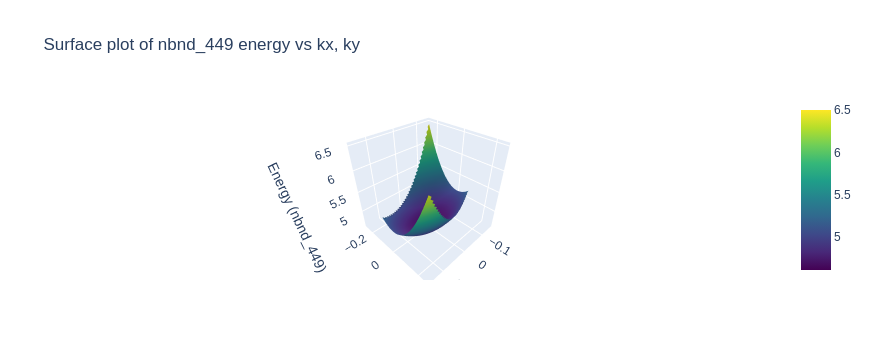

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

# Load the dataset
file_path = 'band_data_fermi_subtracted_with_three_digit_prec.csv'
df = pd.read_csv(file_path)

# Extract the necessary columns
kx = df['kx']
ky = df['ky']
nbnd_1 = df['nbnd_449']  # The energy values for nbnd_1

# Create grid data for interpolation
kx_unique = np.linspace(min(kx), max(kx), 100)  # Create a regular grid of kx
ky_unique = np.linspace(min(ky), max(ky), 100)  # Create a regular grid of ky
kx_grid, ky_grid = np.meshgrid(kx_unique, ky_unique)

# Interpolate the energy values onto the regular grid
nbnd_1_grid = griddata((kx, ky), nbnd_1, (kx_grid, ky_grid), method='cubic')

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(z=nbnd_1_grid, x=kx_unique, y=ky_unique, colorscale='Viridis')])

# Add labels and title
fig.update_layout(scene=dict(
                    xaxis_title='kx',
                    yaxis_title='ky',
                    zaxis_title='Energy (nbnd_449)'),
                  title="Surface plot of nbnd_449 energy vs kx, ky")

# Show the plot
fig.show()
